## HR Analytics Project- Understanding the Attrition in HR
### Problem Statement:
Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

HR Analytics

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

Attrition in HR

Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.

Attrition affecting Companies

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.



In [1]:
#import necessary libraries
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [267]:
from sklearn.preprocessing import LabelEncoder

from scipy.stats import zscore

from imblearn.over_sampling import RandomOverSampler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, plot_roc_curve

In [271]:
#getting the dataset and converting it to dataframe
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [6]:
df.shape

(1470, 35)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

## Exploratory Data Analysis

In [272]:
#get the values of attributes and know how the data spread over the values
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [66]:
#checking if there are any null values
print(df.isnull().sum())

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64


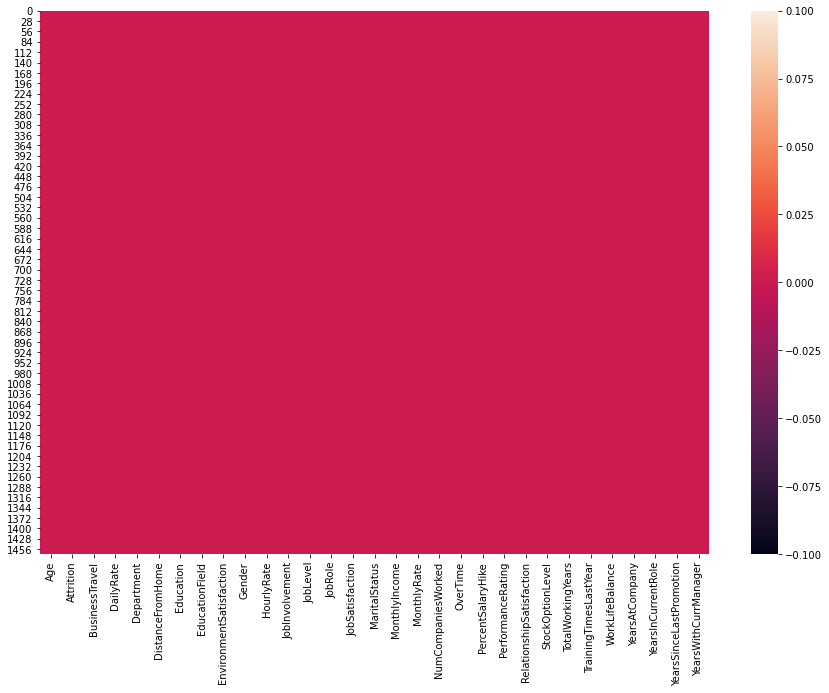

In [68]:
plt.figure(figsize=(15,10), facecolor='white')
sns.heatmap(df.isnull())
plt.show()

In [273]:
#getting the unique values for all features, and getting the unique values of categorical variables
for col in df:
    print(col,':\n',df[col].value_counts())
    print('*****************************************')

Age :
 35    78
34    77
36    69
31    69
29    68
32    61
30    60
38    58
33    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
44    33
46    33
43    32
50    30
24    26
25    26
47    24
49    24
55    22
53    19
48    19
51    19
52    18
54    18
22    16
56    14
23    14
58    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: Age, dtype: int64
*****************************************
Attrition :
 No     1233
Yes     237
Name: Attrition, dtype: int64
*****************************************
BusinessTravel :
 Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
*****************************************
DailyRate :
 691     6
1082    5
408     5
329     5
530     5
       ..
708     1
713     1
717     1
719     1
1499    1
Name: DailyRate, Length: 886, dtype: int64
*****************************************
Department :
 Research & Development    961
Sales 

EmployeeCount, Over18, StadardHours have single unique values hence not important for analysis, and the employee number is ID given to employee which can be removed before analysis

In [274]:
#dropping the unwanted columns
df.drop(columns=['EmployeeCount', 'Over18', 'StandardHours','EmployeeNumber'], inplace=True)
df.shape

(1470, 31)

In [50]:
#checking the available columns in dataset
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [275]:
#For attrition feature, Yes-Left the job, No- Still working,
#hence replacing Yes with 0, No with 1.

df['Attrition'].replace({'Yes':0,'No':1 }, inplace=True)

In [58]:
df['Attrition'].value_counts()

1    1233
0     237
Name: Attrition, dtype: int64

## Visualising the relationship of each attributes with various labels

<AxesSubplot:xlabel='Attrition', ylabel='count'>

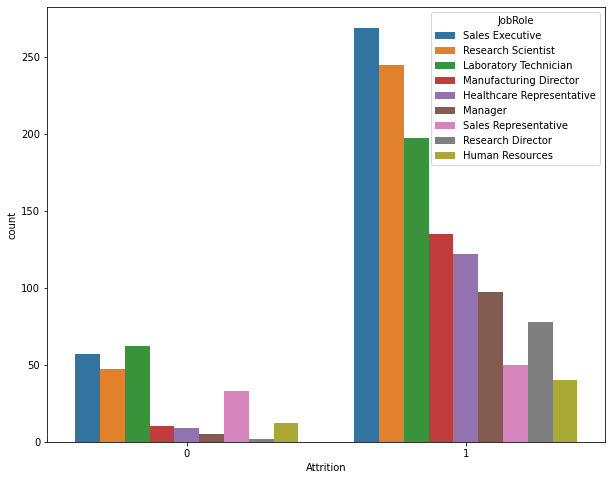

In [93]:
plt.figure(figsize=(10,8), facecolor='white')
sns.countplot(x='Attrition', hue='JobRole', data=df,)

We can see high attrition in Sales executive and Labarotary technicians due to varios reasons.

<AxesSubplot:xlabel='Attrition', ylabel='count'>

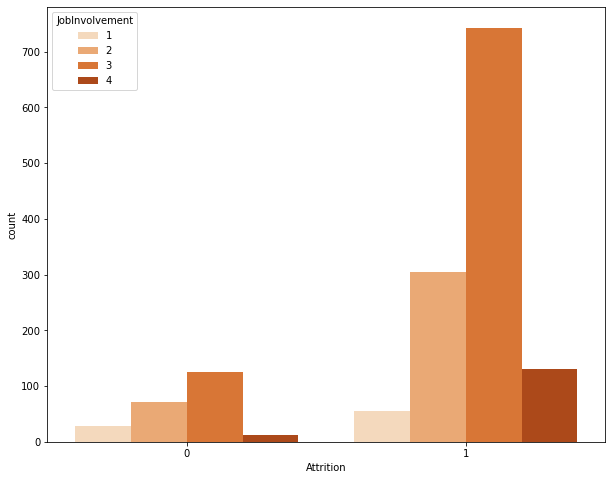

In [122]:
plt.figure(figsize=(10,8), facecolor='white')
sns.countplot(x='Attrition', hue='JobInvolvement', data=df,palette='Oranges')

The attrition is spread over Job Involvment, the records with value of 3 has high attrition 

<AxesSubplot:xlabel='TotalWorkingYears', ylabel='count'>

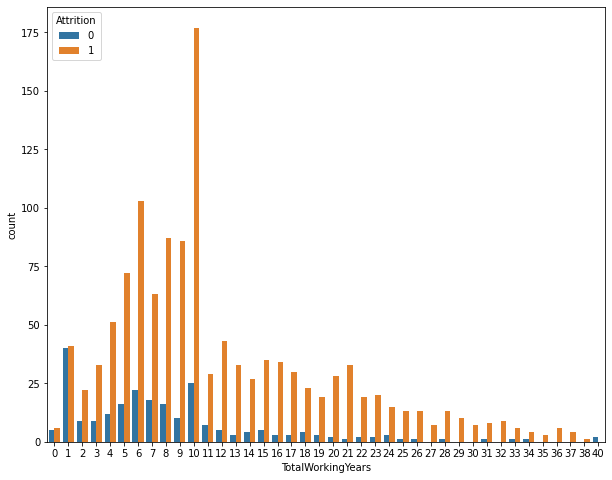

In [99]:
plt.figure(figsize=(10,8), facecolor='white')
sns.countplot(x='TotalWorkingYears', hue='Attrition', data=df,)

There is high level of attrition in human resource is seen below 10 total working years.

<AxesSubplot:xlabel='WorkLifeBalance', ylabel='count'>

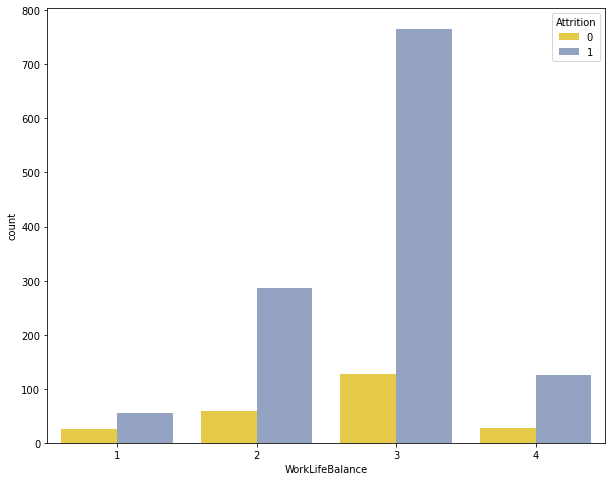

In [115]:
plt.figure(figsize=(10,8), facecolor='white')
sns.countplot(x='WorkLifeBalance', hue='Attrition', data=df,palette='Set2_r')

<AxesSubplot:xlabel='Attrition', ylabel='count'>

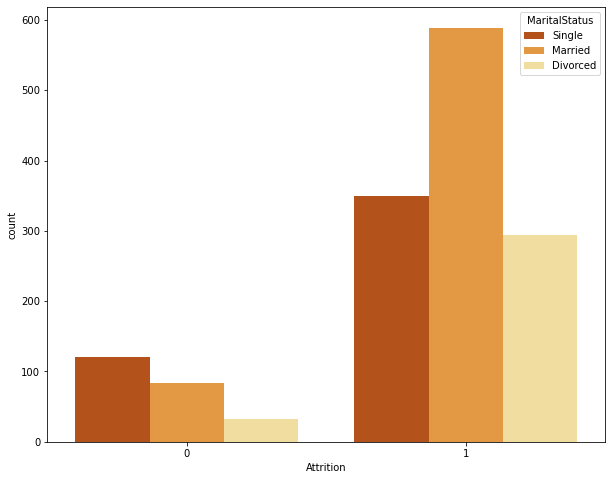

In [113]:
plt.figure(figsize=(10,8), facecolor='white')
sns.countplot(x='Attrition', hue='MaritalStatus', data=df,palette='YlOrBr_r')

It is evident that Singles are the most people who left the jobs than compared to that of married/ divorced.

<AxesSubplot:xlabel='Attrition', ylabel='count'>

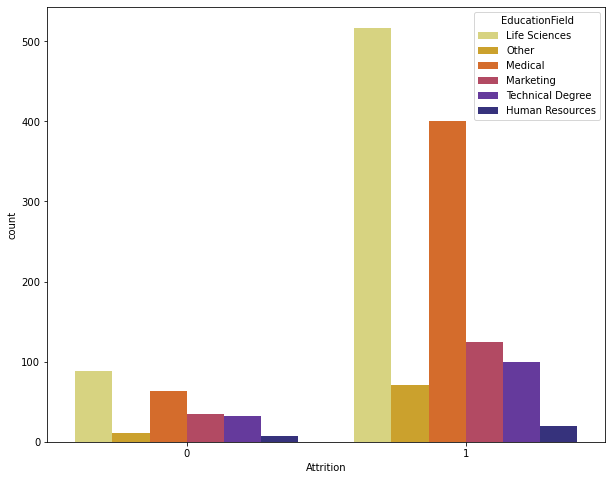

In [109]:
plt.figure(figsize=(10,8), facecolor='white')
sns.countplot(x='Attrition', hue='EducationField', data=df,palette='CMRmap_r')

<AxesSubplot:xlabel='MonthlyIncome'>

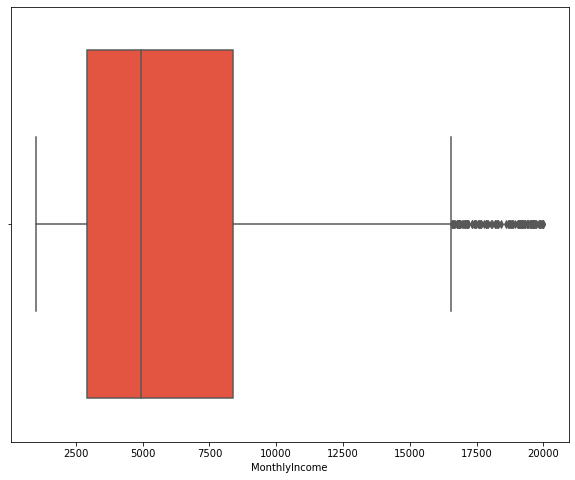

In [131]:
plt.figure(figsize=(10,8), facecolor='white')
sns.boxplot(x='MonthlyIncome', data=df,palette='CMRmap')

It can be seen that average salary lies from 3000 to 10000, there are some outliers who are taking higher salary.

<AxesSubplot:xlabel='OverTime', ylabel='count'>

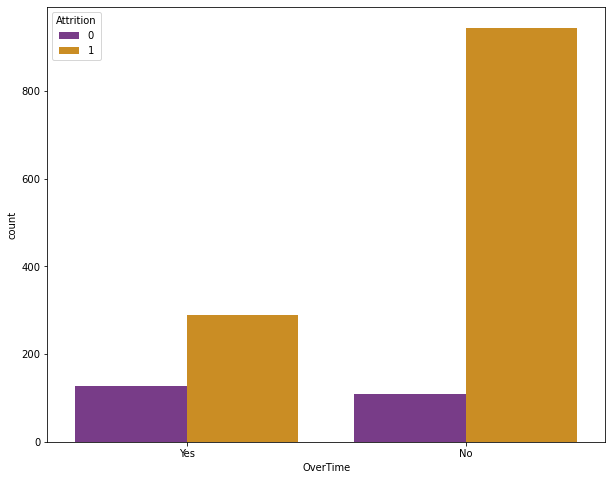

In [136]:
plt.figure(figsize=(10,8), facecolor='white')
sns.countplot(x='OverTime',hue='Attrition',data=df,palette='CMRmap')

Those who have worked for overtime has left the jobs than that of those who have not worked for overtime.

<AxesSubplot:xlabel='YearsSinceLastPromotion', ylabel='count'>

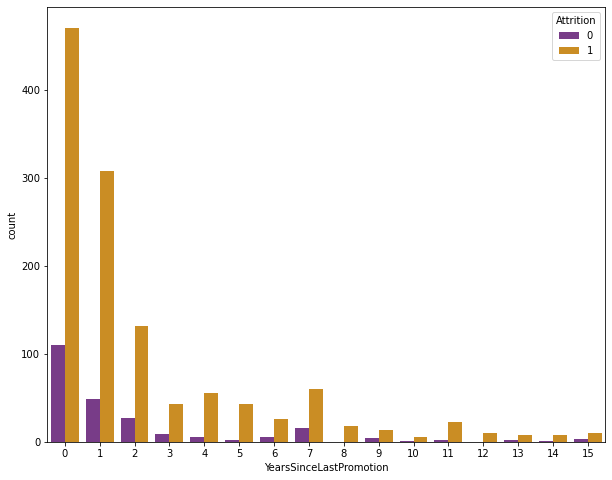

In [137]:
plt.figure(figsize=(10,8), facecolor='white')
sns.countplot(x='YearsSinceLastPromotion',hue='Attrition',data=df,palette='CMRmap')

<AxesSubplot:xlabel='DistanceFromHome', ylabel='count'>

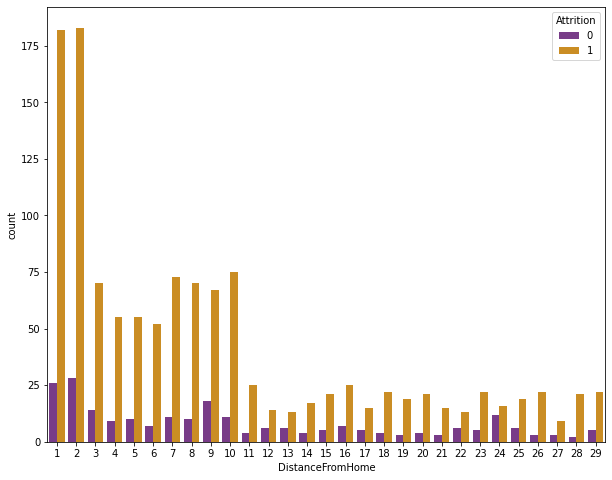

In [138]:
plt.figure(figsize=(10,8), facecolor='white')
sns.countplot(x='DistanceFromHome',hue='Attrition',data=df,palette='CMRmap')

Those who are nearer to the work location seems to stay for longer period of time

<AxesSubplot:xlabel='Attrition', ylabel='count'>

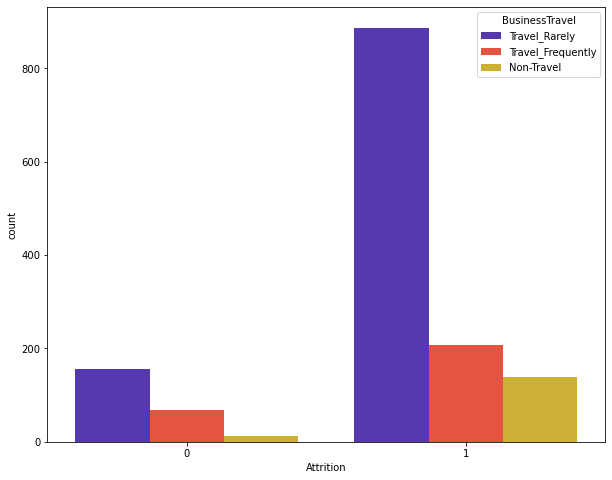

In [140]:
plt.figure(figsize=(10,8), facecolor='white')
sns.countplot(x='Attrition',hue='BusinessTravel',data=df,palette='CMRmap')

<Figure size 720x576 with 0 Axes>

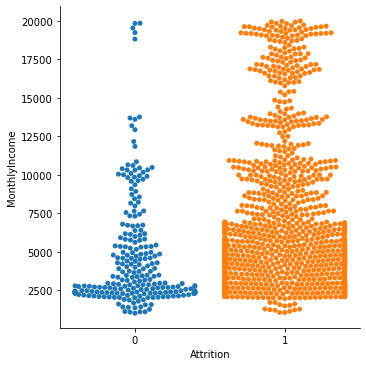

In [143]:
plt.figure(figsize=(10,8), facecolor='white')
sns.catplot(x= 'Attrition', y= 'MonthlyIncome',data = df,kind = 'swarm')

Monthly income of people who are staying in jobs are higher than those who left.

<Figure size 720x576 with 0 Axes>

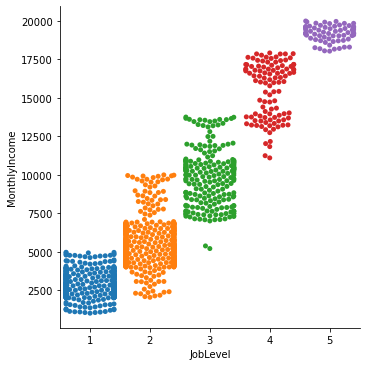

In [147]:
plt.figure(figsize=(10,8), facecolor='white')
sns.catplot(y= 'MonthlyIncome', x= 'JobLevel',data = df,kind = 'swarm')

Higher the job level, higher is the salary per month derived

<Figure size 1080x432 with 0 Axes>

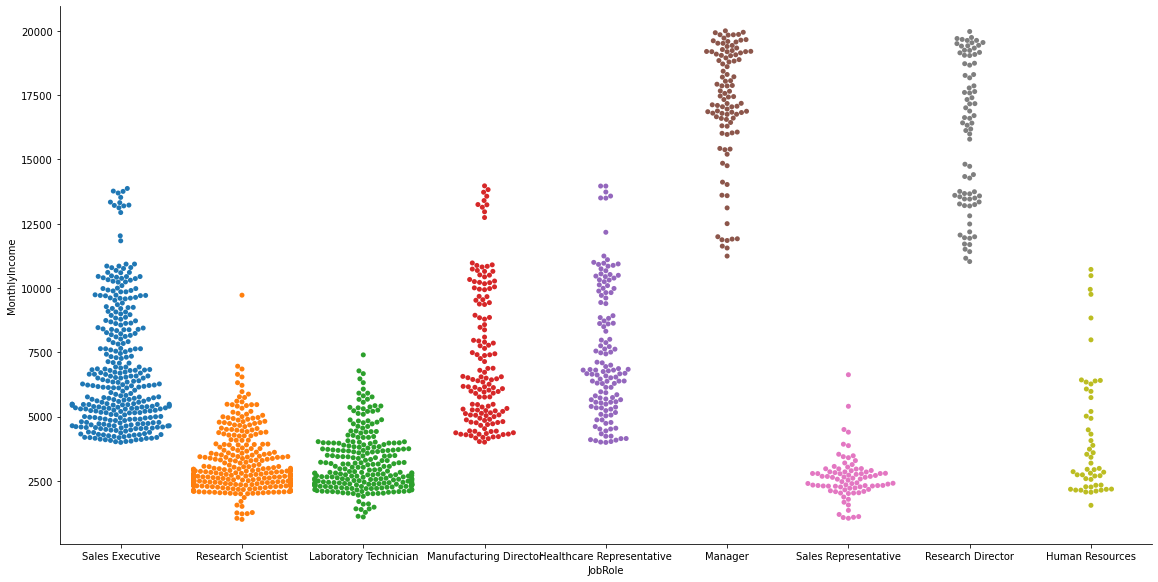

In [162]:
plt.figure(figsize=(15,6), facecolor='white')
sns.catplot(data = df, x = 'JobRole', y = 'MonthlyIncome',kind = 'swarm', aspect = 2, height=8)
plt.show()

Sales executive has average salary between 5k-10k, and research scientist has average salary of 2.5k to 5k per month, same goes for Labarotary technician, Manufacturing Director pulls 6k -10k average salary, same goes fro Representative Job role, Manager pulls around 15k- 20k average salary

<Figure size 1080x432 with 0 Axes>

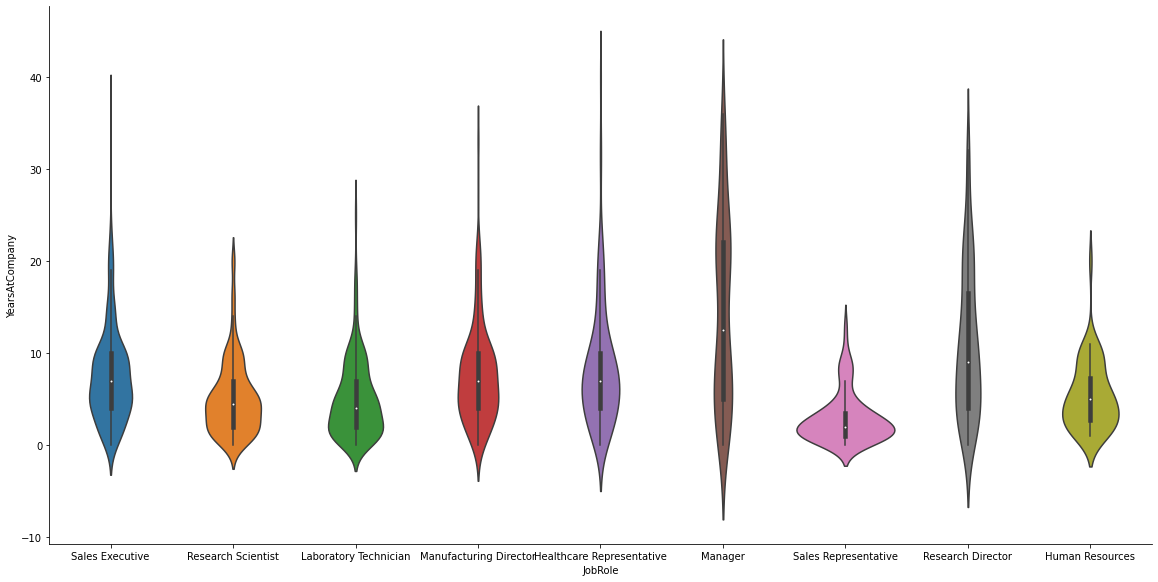

In [165]:
plt.figure(figsize=(15,6), facecolor='white')
sns.catplot(data = df, x = 'JobRole', y = 'YearsAtCompany',kind = 'violin', aspect = 2, height=8)
plt.show()

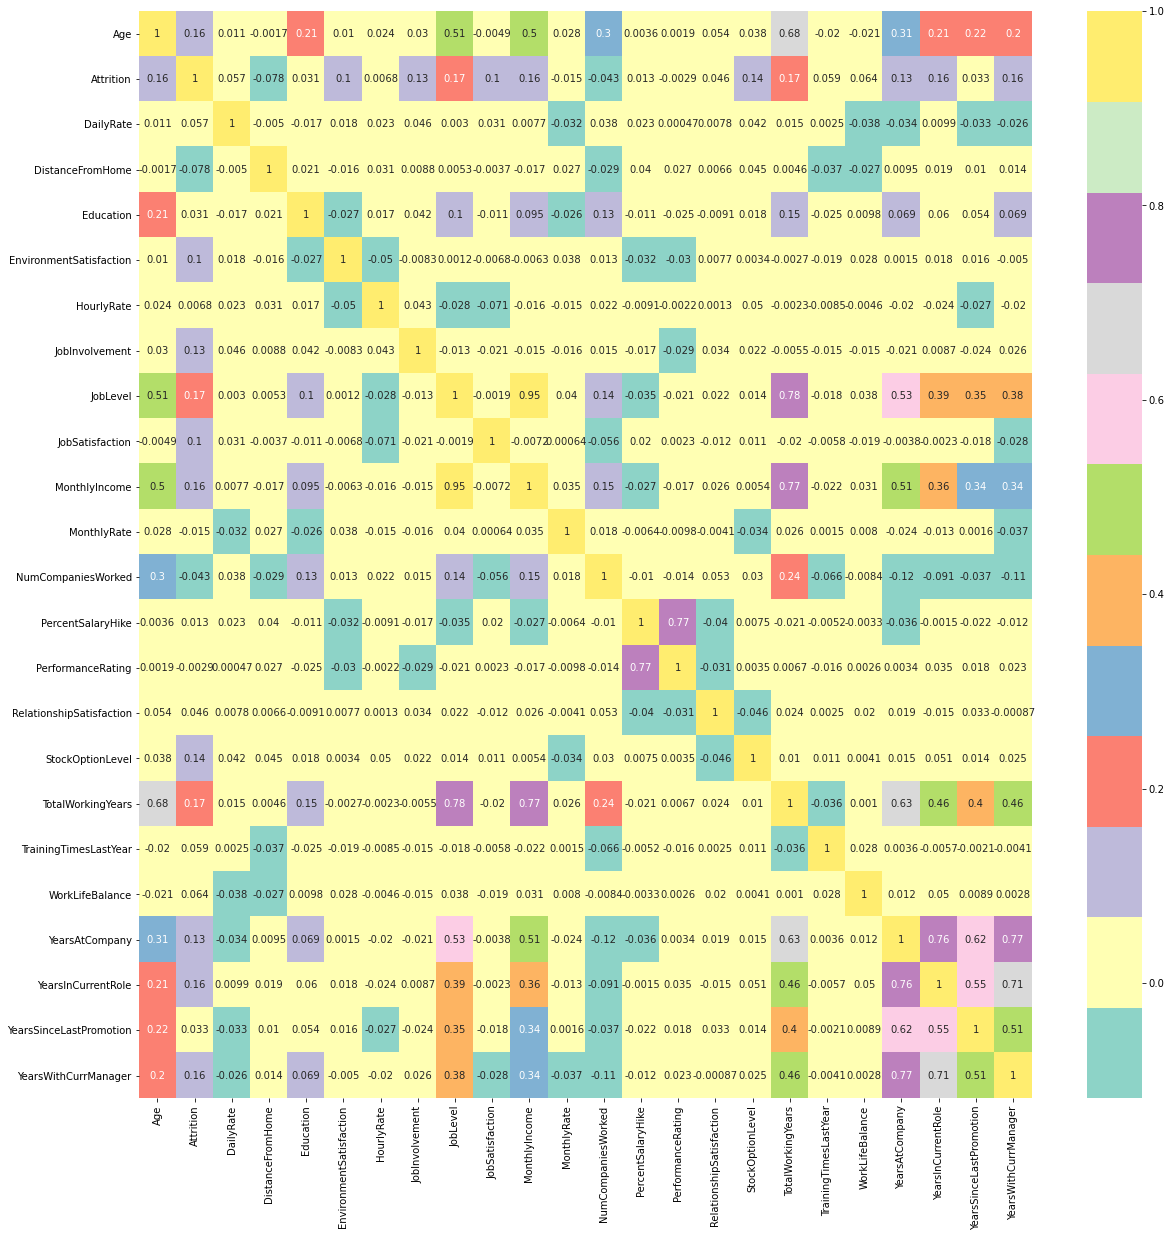

In [187]:
corr = df.corr()
plt.figure(figsize=(20,20), facecolor='white')
sns.heatmap(corr,cmap= 'Set3',annot=True)
plt.show()

'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion','YearsWithCurrManager' are highly correlated and need to be handled.

In [189]:
df.corrwith(df['Attrition'])

Age                         0.159205
Attrition                   1.000000
DailyRate                   0.056652
DistanceFromHome           -0.077924
Education                   0.031373
EnvironmentSatisfaction     0.103369
HourlyRate                  0.006846
JobInvolvement              0.130016
JobLevel                    0.169105
JobSatisfaction             0.103481
MonthlyIncome               0.159840
MonthlyRate                -0.015170
NumCompaniesWorked         -0.043494
PercentSalaryHike           0.013478
PerformanceRating          -0.002889
RelationshipSatisfaction    0.045872
StockOptionLevel            0.137145
TotalWorkingYears           0.171063
TrainingTimesLastYear       0.059478
WorkLifeBalance             0.063939
YearsAtCompany              0.134392
YearsInCurrentRole          0.160545
YearsSinceLastPromotion     0.033019
YearsWithCurrManager        0.156199
dtype: float64

In [84]:
for i in df:
    if df[i].dtype == 'object':
        print(df[i].value_counts())
        print('**********************************')

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
**********************************
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
**********************************
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
**********************************
Male      882
Female    588
Name: Gender, dtype: int64
**********************************
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64
**********************************
Married     673
Single      470


In [279]:
columns = ['BusinessTravel','OverTime','MaritalStatus','JobRole','Gender','EducationField','Department']
for col in columns:
    lab_en = LabelEncoder()
    df[col] = lab_en.fit_transform(df[col])
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,0,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,1,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,0,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,1,1,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,1,2,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,1,1,884,1,23,2,3,3,1,...,3,3,1,17,3,3,5,2,0,3
1466,39,1,2,613,1,6,1,3,4,1,...,3,1,1,9,5,3,7,7,1,7
1467,27,1,2,155,1,4,3,1,2,1,...,4,2,1,6,0,3,6,2,0,3
1468,49,1,1,1023,2,2,3,3,4,1,...,3,4,0,17,3,2,9,6,0,8


In [280]:
df= pd.get_dummies(df, columns = ['BusinessTravel','OverTime','MaritalStatus','JobRole','Gender','EducationField','Department'])

In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 52 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int64
 2   DailyRate                 1470 non-null   int64
 3   DistanceFromHome          1470 non-null   int64
 4   Education                 1470 non-null   int64
 5   EnvironmentSatisfaction   1470 non-null   int64
 6   HourlyRate                1470 non-null   int64
 7   JobInvolvement            1470 non-null   int64
 8   JobLevel                  1470 non-null   int64
 9   JobSatisfaction           1470 non-null   int64
 10  MonthlyIncome             1470 non-null   int64
 11  MonthlyRate               1470 non-null   int64
 12  NumCompaniesWorked        1470 non-null   int64
 13  PercentSalaryHike         1470 non-null   int64
 14  PerformanceRating         1470 non-null 

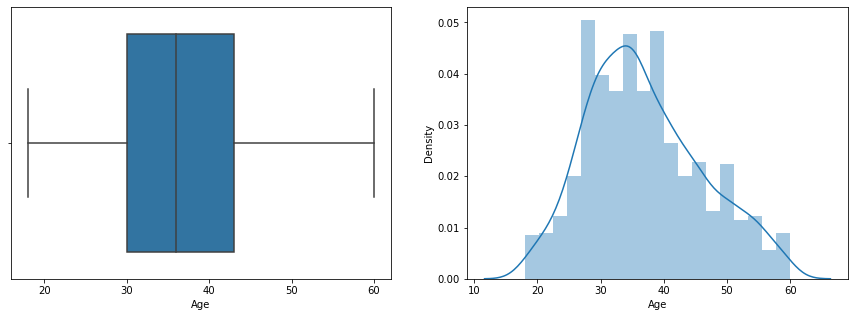

In [201]:
plt.figure(figsize=(15,5), facecolor='white')
ax=plt.subplot(1,2,1)
sns.boxplot(df['Age'])

ax=plt.subplot(1,2,2)
sns.distplot(df['Age'])

plt.show()


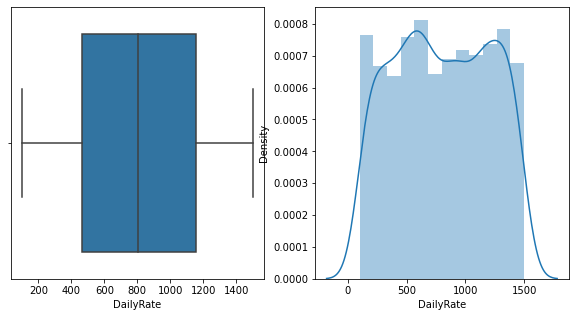

In [202]:
plt.figure(figsize=(10,5), facecolor='white')
ax=plt.subplot(1,2,1)
sns.boxplot(df['DailyRate'])

ax=plt.subplot(1,2,2)
sns.distplot(df['DailyRate'])

plt.show()


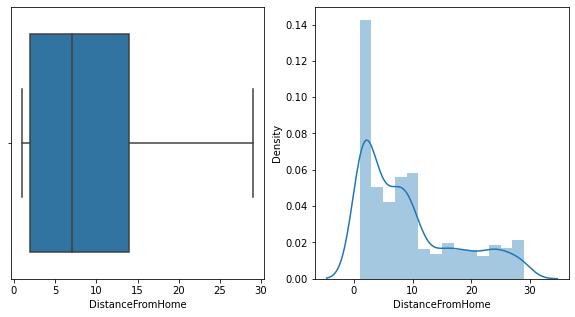

In [203]:
plt.figure(figsize=(10,5), facecolor='white')
ax=plt.subplot(1,2,1)
sns.boxplot(df['DistanceFromHome'])

ax=plt.subplot(1,2,2)
sns.distplot(df['DistanceFromHome'])

plt.show()


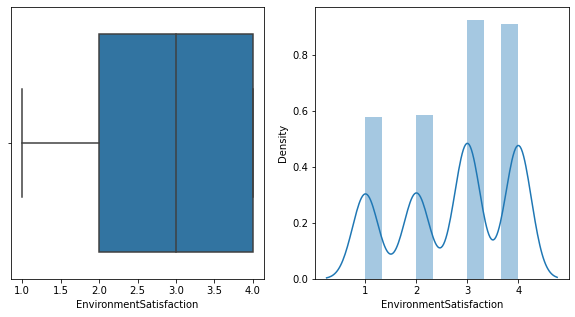

In [205]:
plt.figure(figsize=(10,5), facecolor='white')
ax=plt.subplot(1,2,1)
sns.boxplot(df['EnvironmentSatisfaction'])

ax=plt.subplot(1,2,2)
sns.distplot(df['EnvironmentSatisfaction'])

plt.show()


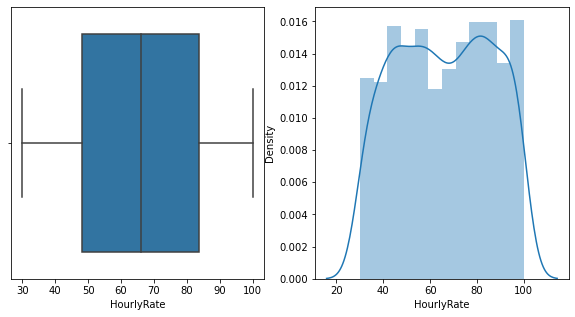

In [208]:
plt.figure(figsize=(10,5), facecolor='white')
ax=plt.subplot(1,2,1)
sns.boxplot(df['HourlyRate'])

ax=plt.subplot(1,2,2)
sns.distplot(df['HourlyRate'])

plt.show()


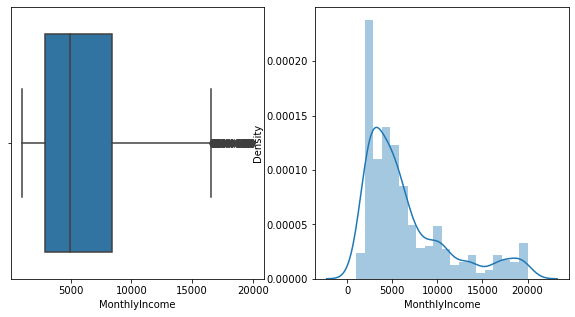

In [207]:
plt.figure(figsize=(10,5), facecolor='white')
ax=plt.subplot(1,2,1)
sns.boxplot(df['MonthlyIncome'])

ax=plt.subplot(1,2,2)
sns.distplot(df['MonthlyIncome'])

plt.show()


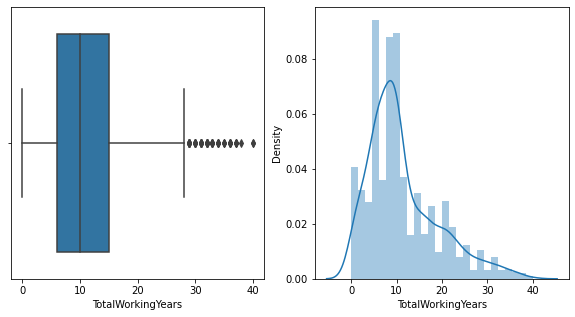

In [209]:
plt.figure(figsize=(10,5), facecolor='white')
ax=plt.subplot(1,2,1)
sns.boxplot(df['TotalWorkingYears'])

ax=plt.subplot(1,2,2)
sns.distplot(df['TotalWorkingYears'])

plt.show()


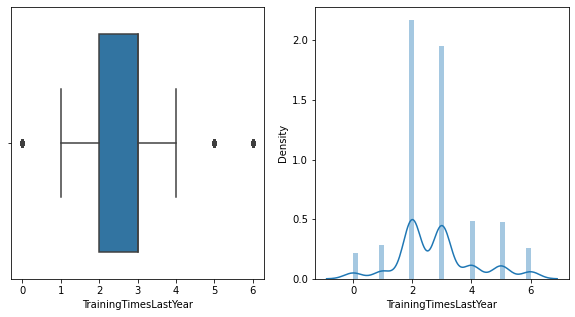

In [210]:
plt.figure(figsize=(10,5), facecolor='white')
ax=plt.subplot(1,2,1)
sns.boxplot(df['TrainingTimesLastYear'])

ax=plt.subplot(1,2,2)
sns.distplot(df['TrainingTimesLastYear'])

plt.show()


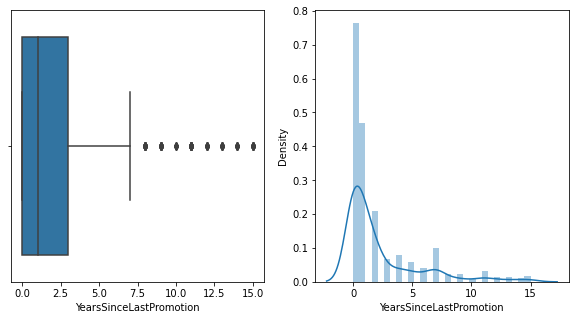

In [211]:
plt.figure(figsize=(10,5), facecolor='white')
ax=plt.subplot(1,2,1)
sns.boxplot(df['YearsSinceLastPromotion'])

ax=plt.subplot(1,2,2)
sns.distplot(df['YearsSinceLastPromotion'])

plt.show()


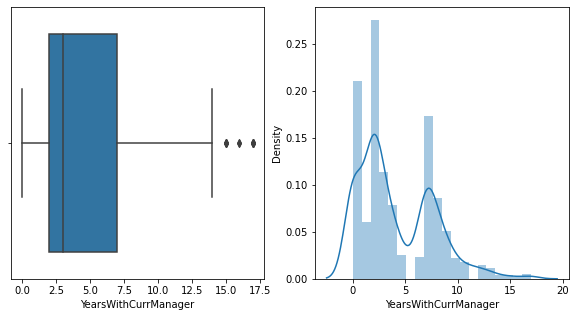

In [212]:
plt.figure(figsize=(10,5), facecolor='white')
ax=plt.subplot(1,2,1)
sns.boxplot(df['YearsWithCurrManager'])

ax=plt.subplot(1,2,2)
sns.distplot(df['YearsWithCurrManager'])

plt.show()


As 'YearsAtCompany','YearsInCurrentRole', 'YearsSinceLastPromotion','YearsWithCurrManager' are correlated. We can reduce collinearity by removing the attributes

In [224]:
## Let us remove outliers:-
columns=df[['MonthlyIncome','TotalWorkingYears','TrainingTimesLastYear','NumCompaniesWorked','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]
z_score= zscore(columns)
abs_sc = np.abs(z_score)

filtr = (abs_sc<3).all(axis=1)
df = df[filtr]

In [225]:
#creating X and Y labels to split the data
X=df.drop('Attrition',axis=1)

y=df['Attrition']

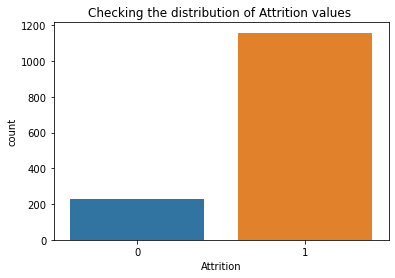

In [233]:
sns.countplot(y)
plt.title('Checking the distribution of Attrition values ')
plt.show()

As these are not equally distributed, our model may not predict with high accuracy. Hence we have to treat the model to remove the imbalance in datasets


In [236]:
#using randomover sampler to balance the data
sampler=RandomOverSampler()
X,y = sampler.fit_resample(X,y)

In [238]:
X.shape, y.shape

((2316, 51), (2316,))

In [247]:
#Selecting the best random state for the model
maxAcc=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=i)
    model=RandomForestClassifier()
    model.fit(x_train,y_train)
    predict=model.predict(x_test)
    acc=accuracy_score(y_test,predict)
    if acc>maxAcc:
        maxAccu=acc
        maxRS=i
print("Highest accuracy score ",maxAccu,"is seen with random state", maxRS)

Highest accuracy score  0.9539568345323741 is seen with random state 199


In [248]:
#spliting the data into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.3, random_state=199)

### 1. Logistic Regression

In [253]:
Log_reg = LogisticRegression()
Log_reg.fit(X_train, y_train)
y_pred = Log_reg.predict(X_test)

print("******************RESULTS******************")
print("\n The accuracy score of Model :", accuracy_score(y_test,y_pred))


CV=cross_val_score(Log_reg,X_train, y_train,cv=5)
print("\n The CV score of Model :", CV.mean())

print("\n The confusion Matrix :\n ", confusion_matrix(y_test, y_pred))
print("\n The classification report:\n ",classification_report(y_test, y_pred))
print("\n roc_auc_score: ",roc_auc_score(y_test,y_pred))
      
      
print("*******************************************")

******************RESULTS******************

 The accuracy score of Model : 0.6454993834771886

 The CV score of Model : 0.6483474090292983

 The confusion Matrix :
  [[514 304]
 [271 533]]

 The classification report:
                precision    recall  f1-score   support

           0       0.65      0.63      0.64       818
           1       0.64      0.66      0.65       804

    accuracy                           0.65      1622
   macro avg       0.65      0.65      0.65      1622
weighted avg       0.65      0.65      0.65      1622


 roc_auc_score:  0.6456485907868968
*******************************************


### 2. KNeighbours Classifier

In [254]:
knn_class = KNeighborsClassifier()
knn_class.fit(X_train, y_train)
y_pred = knn_class.predict(X_test)

print("******************RESULTS******************")
print("\n The accuracy score of Model :", accuracy_score(y_test,y_pred))


CV=cross_val_score(knn_class,X_train, y_train,cv=5)
print("\n The CV score of Model :", CV.mean())

print("\n The confusion Matrix :\n ", confusion_matrix(y_test, y_pred))
print("\n The classification report:\n ",classification_report(y_test, y_pred))
print("\n roc_auc_score: ",roc_auc_score(y_test,y_pred))
      
      
print("*******************************************")

******************RESULTS******************

 The accuracy score of Model : 0.6621454993834772

 The CV score of Model : 0.6469711187571681

 The confusion Matrix :
  [[570 248]
 [300 504]]

 The classification report:
                precision    recall  f1-score   support

           0       0.66      0.70      0.68       818
           1       0.67      0.63      0.65       804

    accuracy                           0.66      1622
   macro avg       0.66      0.66      0.66      1622
weighted avg       0.66      0.66      0.66      1622


 roc_auc_score:  0.6618435937671058
*******************************************


### 3. Adaboost

In [255]:
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)

print("******************RESULTS******************")
print("\n The accuracy score of Model :", accuracy_score(y_test,y_pred))


CV=cross_val_score(ada,X_train, y_train,cv=5)
print("\n The CV score of Model :", CV.mean())

print("\n The confusion Matrix :\n ", confusion_matrix(y_test, y_pred))
print("\n The classification report:\n ",classification_report(y_test, y_pred))
print("\n roc_auc_score: ",roc_auc_score(y_test,y_pred))
      
      
print("*******************************************")

******************RESULTS******************

 The accuracy score of Model : 0.8076448828606658

 The CV score of Model : 0.7708580961317901

 The confusion Matrix :
  [[674 144]
 [168 636]]

 The classification report:
                precision    recall  f1-score   support

           0       0.80      0.82      0.81       818
           1       0.82      0.79      0.80       804

    accuracy                           0.81      1622
   macro avg       0.81      0.81      0.81      1622
weighted avg       0.81      0.81      0.81      1622


 roc_auc_score:  0.807502828157501
*******************************************


### 4. Random Forest

In [256]:
ran_class = RandomForestClassifier()
ran_class.fit(X_train, y_train)
y_pred = ran_class.predict(X_test)

print("******************RESULTS******************")
print("\n The accuracy score of Model :", accuracy_score(y_test,y_pred))


CV=cross_val_score(ran_class,X_train, y_train,cv=5)
print("\n The CV score of Model :", CV.mean())

print("\n The confusion Matrix :\n ", confusion_matrix(y_test, y_pred))
print("\n The classification report:\n ",classification_report(y_test, y_pred))
print("\n roc_auc_score: ",roc_auc_score(y_test,y_pred))
      
      
print("*******************************************")

******************RESULTS******************

 The accuracy score of Model : 0.9001233045622689

 The CV score of Model : 0.8457929308726932

 The confusion Matrix :
  [[748  70]
 [ 92 712]]

 The classification report:
                precision    recall  f1-score   support

           0       0.89      0.91      0.90       818
           1       0.91      0.89      0.90       804

    accuracy                           0.90      1622
   macro avg       0.90      0.90      0.90      1622
weighted avg       0.90      0.90      0.90      1622


 roc_auc_score:  0.8999987835881715
*******************************************


### 5. XGBoost Classifier

In [257]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

print("******************RESULTS******************")
print("\n The accuracy score of Model :", accuracy_score(y_test,y_pred))


CV=cross_val_score(xgb,X_train, y_train,cv=5)
print("\n The CV score of Model :", CV.mean())

print("\n The confusion Matrix :\n ", confusion_matrix(y_test, y_pred))
print("\n The classification report:\n ",classification_report(y_test, y_pred))
print("\n roc_auc_score: ",roc_auc_score(y_test,y_pred))
      
      
print("*******************************************")

[00:31:17] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
******************RESULTS******************

 The accuracy score of Model : 0.8785450061652281
[00:31:18] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:31:18] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:31:18] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was ch

#### CV score of Randomforest Classifier model is high, Let us tune the parameters to improve the accuracy

In [258]:
params = {  'bootstrap': [True], 'max_depth': [5, 7, 10, 12], 'max_features': ['auto', 'log2'], 'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]}
RF_grid  = GridSearchCV(estimator=ran_class,param_grid=params, verbose=2, n_jobs=10, )
RF_grid.fit(X_train, y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


GridSearchCV(estimator=RandomForestClassifier(), n_jobs=10,
             param_grid={'bootstrap': [True], 'max_depth': [5, 7, 10, 12],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]},
             verbose=2)

In [259]:
y_pred = RF_grid.predict(X_test)

print("******************RESULTS******************")
print("\n The accuracy score of Model :", accuracy_score(y_test,y_pred))


CV=cross_val_score(RF_grid,X_train, y_train,cv=5)
print("\n The CV score of Model :", CV.mean())

print("\n The confusion Matrix :\n ", confusion_matrix(y_test, y_pred))
print("\n The classification report:\n ",classification_report(y_test, y_pred))
print("\n roc_auc_score: ",roc_auc_score(y_test,y_pred))
      
      
print("*******************************************")

******************RESULTS******************

 The accuracy score of Model : 0.8643649815043156
Fitting 5 folds for each of 80 candidates, totalling 400 fits
Fitting 5 folds for each of 80 candidates, totalling 400 fits
Fitting 5 folds for each of 80 candidates, totalling 400 fits
Fitting 5 folds for each of 80 candidates, totalling 400 fits
Fitting 5 folds for each of 80 candidates, totalling 400 fits

 The CV score of Model : 0.8227192159316026

 The confusion Matrix :
  [[731  87]
 [133 671]]

 The classification report:
                precision    recall  f1-score   support

           0       0.85      0.89      0.87       818
           1       0.89      0.83      0.86       804

    accuracy                           0.86      1622
   macro avg       0.87      0.86      0.86      1622
weighted avg       0.87      0.86      0.86      1622


 roc_auc_score:  0.8641100731063508
*******************************************


In [260]:
RF_grid.best_params_

{'bootstrap': True,
 'max_depth': 12,
 'max_features': 'auto',
 'n_estimators': 13}

In [261]:
ran_class = RandomForestClassifier(bootstrap=True, max_depth=12, max_features='auto', n_estimators=13)
ran_class.fit(X_train, y_train)
y_pred = ran_class.predict(X_test)

print("******************RESULTS******************")
print("\n The accuracy score of Model :", accuracy_score(y_test,y_pred))


CV=cross_val_score(ran_class,X_train, y_train,cv=5)
print("\n The CV score of Model :", CV.mean())

print("\n The confusion Matrix :\n ", confusion_matrix(y_test, y_pred))
print("\n The classification report:\n ",classification_report(y_test, y_pred))
print("\n roc_auc_score: ",roc_auc_score(y_test,y_pred))
      
      
print("*******************************************")

******************RESULTS******************

 The accuracy score of Model : 0.8655980271270037

 The CV score of Model : 0.8428943801480555

 The confusion Matrix :
  [[734  84]
 [134 670]]

 The classification report:
                precision    recall  f1-score   support

           0       0.85      0.90      0.87       818
           1       0.89      0.83      0.86       804

    accuracy                           0.87      1622
   macro avg       0.87      0.87      0.87      1622
weighted avg       0.87      0.87      0.87      1622


 roc_auc_score:  0.865321923390383
*******************************************


even after hyper parameter tuning we see nearly the same values in output.

<Figure size 720x720 with 0 Axes>

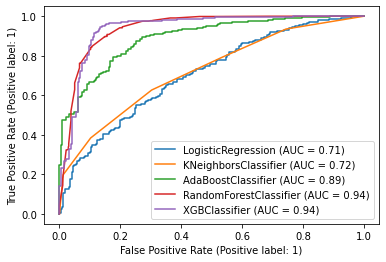

In [268]:
plt.figure(figsize=(10,10,))
graph = plot_roc_curve(Log_reg,X_test, y_test)
plot_roc_curve(knn_class,X_test, y_test, ax=graph.ax_)
plot_roc_curve(ada,X_test, y_test,ax=graph.ax_)
plot_roc_curve(ran_class,X_test, y_test,ax=graph.ax_)
plot_roc_curve(xgb,X_test, y_test,ax=graph.ax_)
           
plt.show()


## Saving the model

As RandomForest and XG Boost classifiers have same AUC value, we are selecting RandomForest as it has higher CV score.

In [270]:
#save the model
import pickle

#open a file where you want to store the dat
file = open('HR Analytics.pkl','wb')

#dump the information to the file
pickle.dump(ran_class,file)